In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
wine= pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.values[0]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ,  5.    ])

In [4]:
def preprocessing(data):
    data.rename(columns={'fixed acidity':'fixed_acidity', 
                         'volatile acidity':'volatile_acidity',
                         'citric acid':'citric_acid',
                         'residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide',
                         'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
    

In [5]:
preprocessing(wine)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## quality vs fixed_acidity

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

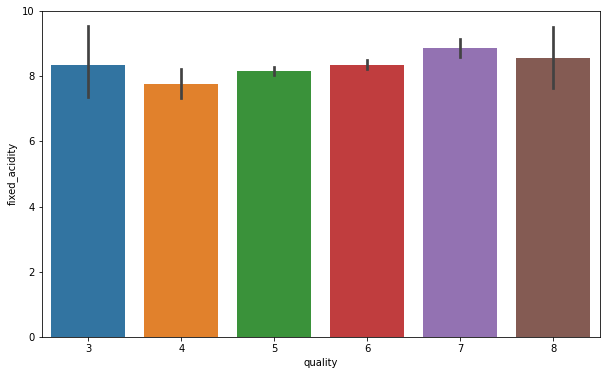

In [7]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed_acidity', data= wine)

* Nothing more significant observing the above graph

# quality vs volatile_acidity

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

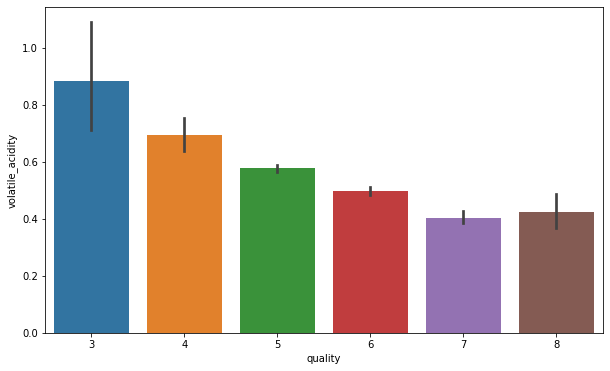

In [8]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile_acidity', data= wine)

* If quality is increasing then , volatile acidity is decreaaing

# quality vs citric_acid

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

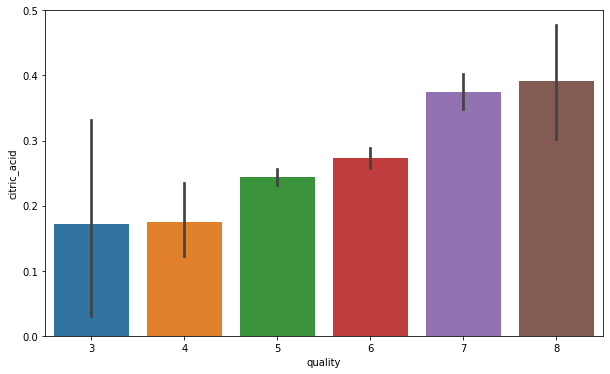

In [9]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric_acid', data= wine)

* citric acidity is increasing as we increase the quailty

# quality vs residual_sugar

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

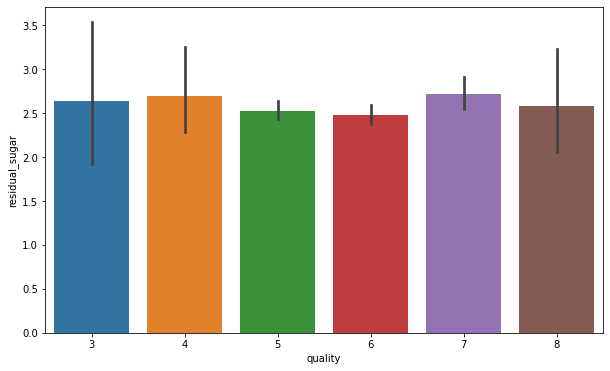

In [10]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual_sugar', data= wine)

# quality vs chlorides

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

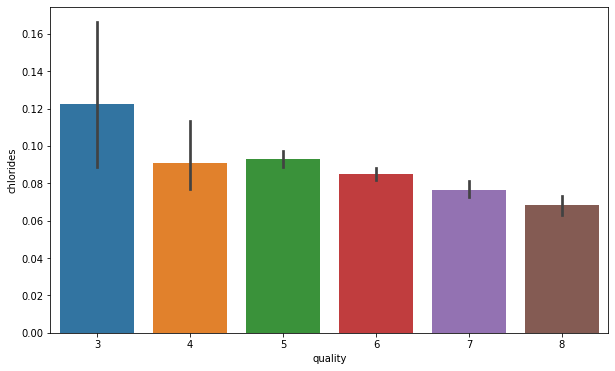

In [11]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides', data= wine)

* chlorides decreasing as we decrease the quality

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

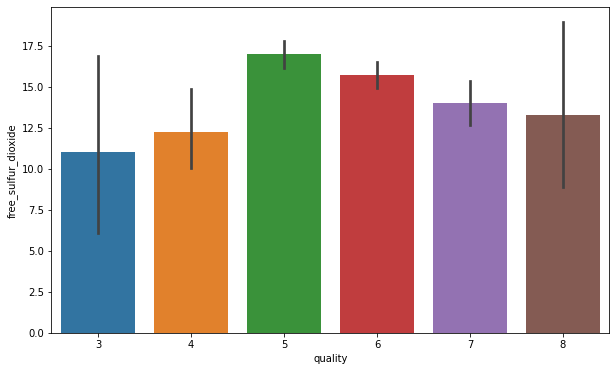

In [12]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free_sulfur_dioxide', data= wine)

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

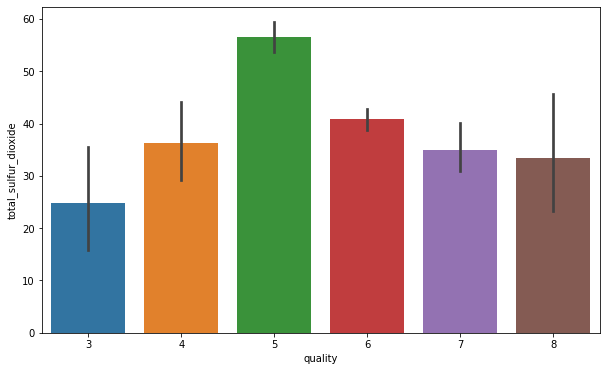

In [13]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total_sulfur_dioxide', data= wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

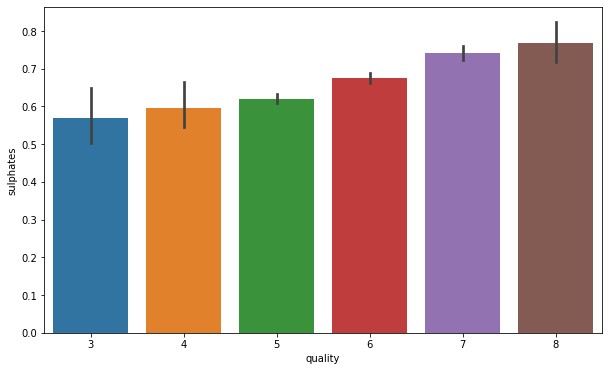

In [14]:
fig= plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates', data= wine)
# sulphates increases as we increase the quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

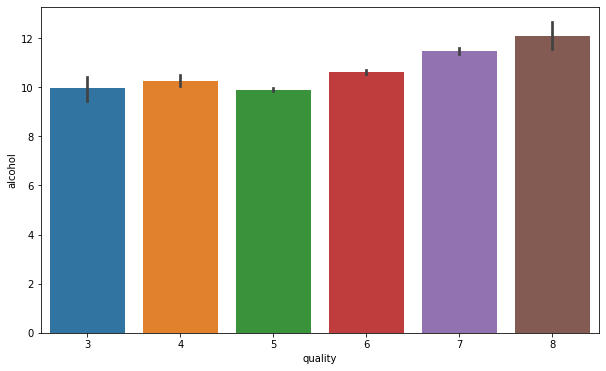

In [15]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

### If the quality greater than or equal to 7 ==> good
<br>

### Else ==> bad

In [16]:
def replacenum(num):
    if num<7:
        return 0
    else:
        return 1

In [17]:
def divide(data):
    data['quality']= data['quality'].apply(lambda x : replacenum(x))
    

In [18]:
divide(wine)

In [19]:
print(wine['quality'].unique())
print(wine['quality'].value_counts())
print(wine.shape)

[0 1]
0    1382
1     217
Name: quality, dtype: int64
(1599, 12)


In [20]:
X= wine.drop('quality', axis=1)
Y= wine['quality']

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score


In [22]:
sc= StandardScaler()

In [23]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)


In [24]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [25]:
# # Random Forest Classifier
# print(f"Score of Logistic : {get_score(RandomForestClassifier(n_estimators=200), X_train, X_test, Y_train, Y_test)}")
print(f"Score for SVM is:{ get_score(SVC(gamma='auto'),X_train, X_test, Y_train, Y_test)}")
print(f"Score for RFC is:{ get_score(RandomForestClassifier(n_estimators=200),X_train, X_test, Y_train, Y_test)}")
print(f"Score for SGD is:{ get_score(SGDClassifier(penalty=None),X_train, X_test, Y_train, Y_test)}")

Score for SVM is:0.875
Score for RFC is:0.875
Score for SGD is:0.846875


## Lets try to increase ou model accuracy of models

In [26]:
# MODELS

# scv= SVC()
# rfc = RandomForestClassifier(n_estimators=200)
# sgd = SGDClassifier(penalty=None)


In [27]:
model_params={
    'scv':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
            'kernel':['rbf','linear'],
            'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100,150,200,250],
            'max_depth':[5,10,15,20,25,30]
            
        }
    }
}

In [28]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,scv,0.904614,"{'C': 1.1, 'gamma': 1.1, 'kernel': 'rbf'}"
1,random_forest,0.909311,"{'max_depth': 20, 'n_estimators': 150}"


In [29]:
#Let's run our rfc again with the best parameters.

print(f"Score for RFC is:{ get_score(RandomForestClassifier(n_estimators=10,max_depth= 20),X_train, X_test, Y_train, Y_test)}")

Score for RFC is:0.875


In [30]:
rfc_model =RandomForestClassifier(n_estimators=10,max_depth= 20)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=10)

In [31]:
import pickle
saved_model= pickle.dumps(rfc_model)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [32]:
print(X_train[0])
print(Y_train[0])

[ 0.21833164  0.88971201  0.19209222  0.30972563 -0.04964208  0.69100692
  1.04293362  1.84669643  1.09349989  0.45822284  1.12317723]
0


In [33]:
rfc_model.predict([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
        0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
        1.12317723]])

array([0])

In [34]:
rfc_model.score(X_test, Y_test)

0.86875

In [35]:
rfc_model.predict([[7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4 ]])

array([0])